In [291]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay

In [224]:
df = pd.read_csv('TravelInsurancePrediction.csv')

### Data Cleaning

In [225]:
df.isna().sum()

Age                      0
Employment Type          0
GraduateOrNot            0
AnnualIncome             0
FamilyMembers          128
ChronicDiseases          0
FrequentFlyer            0
EverTravelledAbroad     68
TravelInsurance          0
dtype: int64

In [226]:
df.shape

(2014, 9)

In [227]:
df.dropna(inplace=True)

In [228]:
df.duplicated().sum()

669

In [229]:
df.drop_duplicates(inplace=True)

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1157 entries, 1 to 1985
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1157 non-null   int64  
 1   Employment Type      1157 non-null   object 
 2   GraduateOrNot        1157 non-null   object 
 3   AnnualIncome         1157 non-null   int64  
 4   FamilyMembers        1157 non-null   float64
 5   ChronicDiseases      1157 non-null   int64  
 6   FrequentFlyer        1157 non-null   object 
 7   EverTravelledAbroad  1157 non-null   object 
 8   TravelInsurance      1157 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 90.4+ KB


## Supervised Learning

### Menentukan Features dan Target

In [267]:
X = df.drop('TravelInsurance', axis=1)
y = df['TravelInsurance']

### Encoding untuk setiap features non numeric categorical dengan ordinal encoder

In [272]:
from sklearn.preprocessing import OrdinalEncoder

enc = OrdinalEncoder()

X['FrequentFlyer'] = enc.fit_transform(X[['FrequentFlyer']])
X['EverTravelledAbroad'] = enc.fit_transform(X[['EverTravelledAbroad']])
X['ChronicDiseases'] = enc.fit_transform(X[['ChronicDiseases']])
X['Employment Type'] = enc.fit_transform(X[['Employment Type']])
X['GraduateOrNot'] = enc.fit_transform(X[['GraduateOrNot']])

### Scaling AnnualIncome dan Age dengan StandardScaler

In [293]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X['AnnualIncome'] = ss.fit_transform(X[['AnnualIncome']])
X['Age'] = ss.fit_transform(X[['Age']])

### Split Dataset untuk train dan test

In [294]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, test_size = 0.2)

### Menggunakan SVC untuk membuat svm

In [295]:
from sklearn.svm import SVC
svm = SVC(kernel="linear")
# Train svm dengan data train yang sudah di split
svm.fit(X_train, y_train)
# masukkan svm.predict ke dalam y_pred
y_pred = svm.predict(X_test)

lihat isi y_pred

In [296]:
y_pred

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

panggil fungsi score untuk melihat akurasi

In [297]:
svm.score(X_test, y_test)

0.6594827586206896

### Confusion Matrix

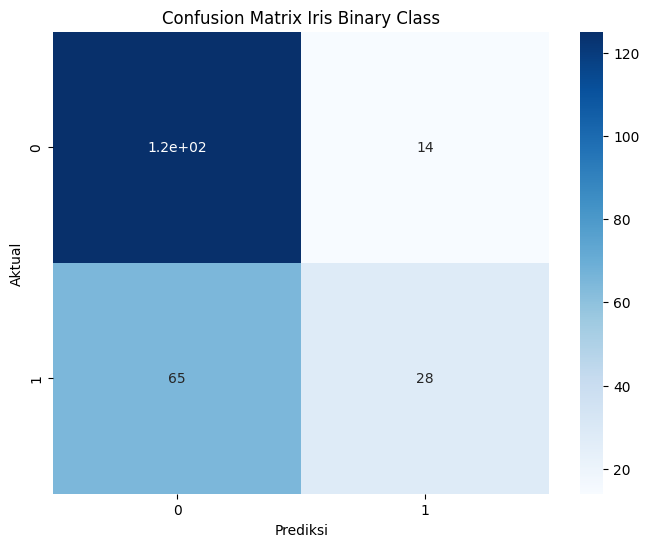

In [300]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasi Confusion Matrix dengan Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix Iris Binary Class')
plt.show()

### Menggunakan Random Forest Classifier

In [286]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(n_estimators=5)
forest_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [288]:
forest_model.score(X_test,y_test)

0.646551724137931

In [290]:
y_pred = svm.predict(X_test)

#### Menampilkan plot decision tree untuk random forest classifier dengan menggunakan tree.plot_tree dari sklearn

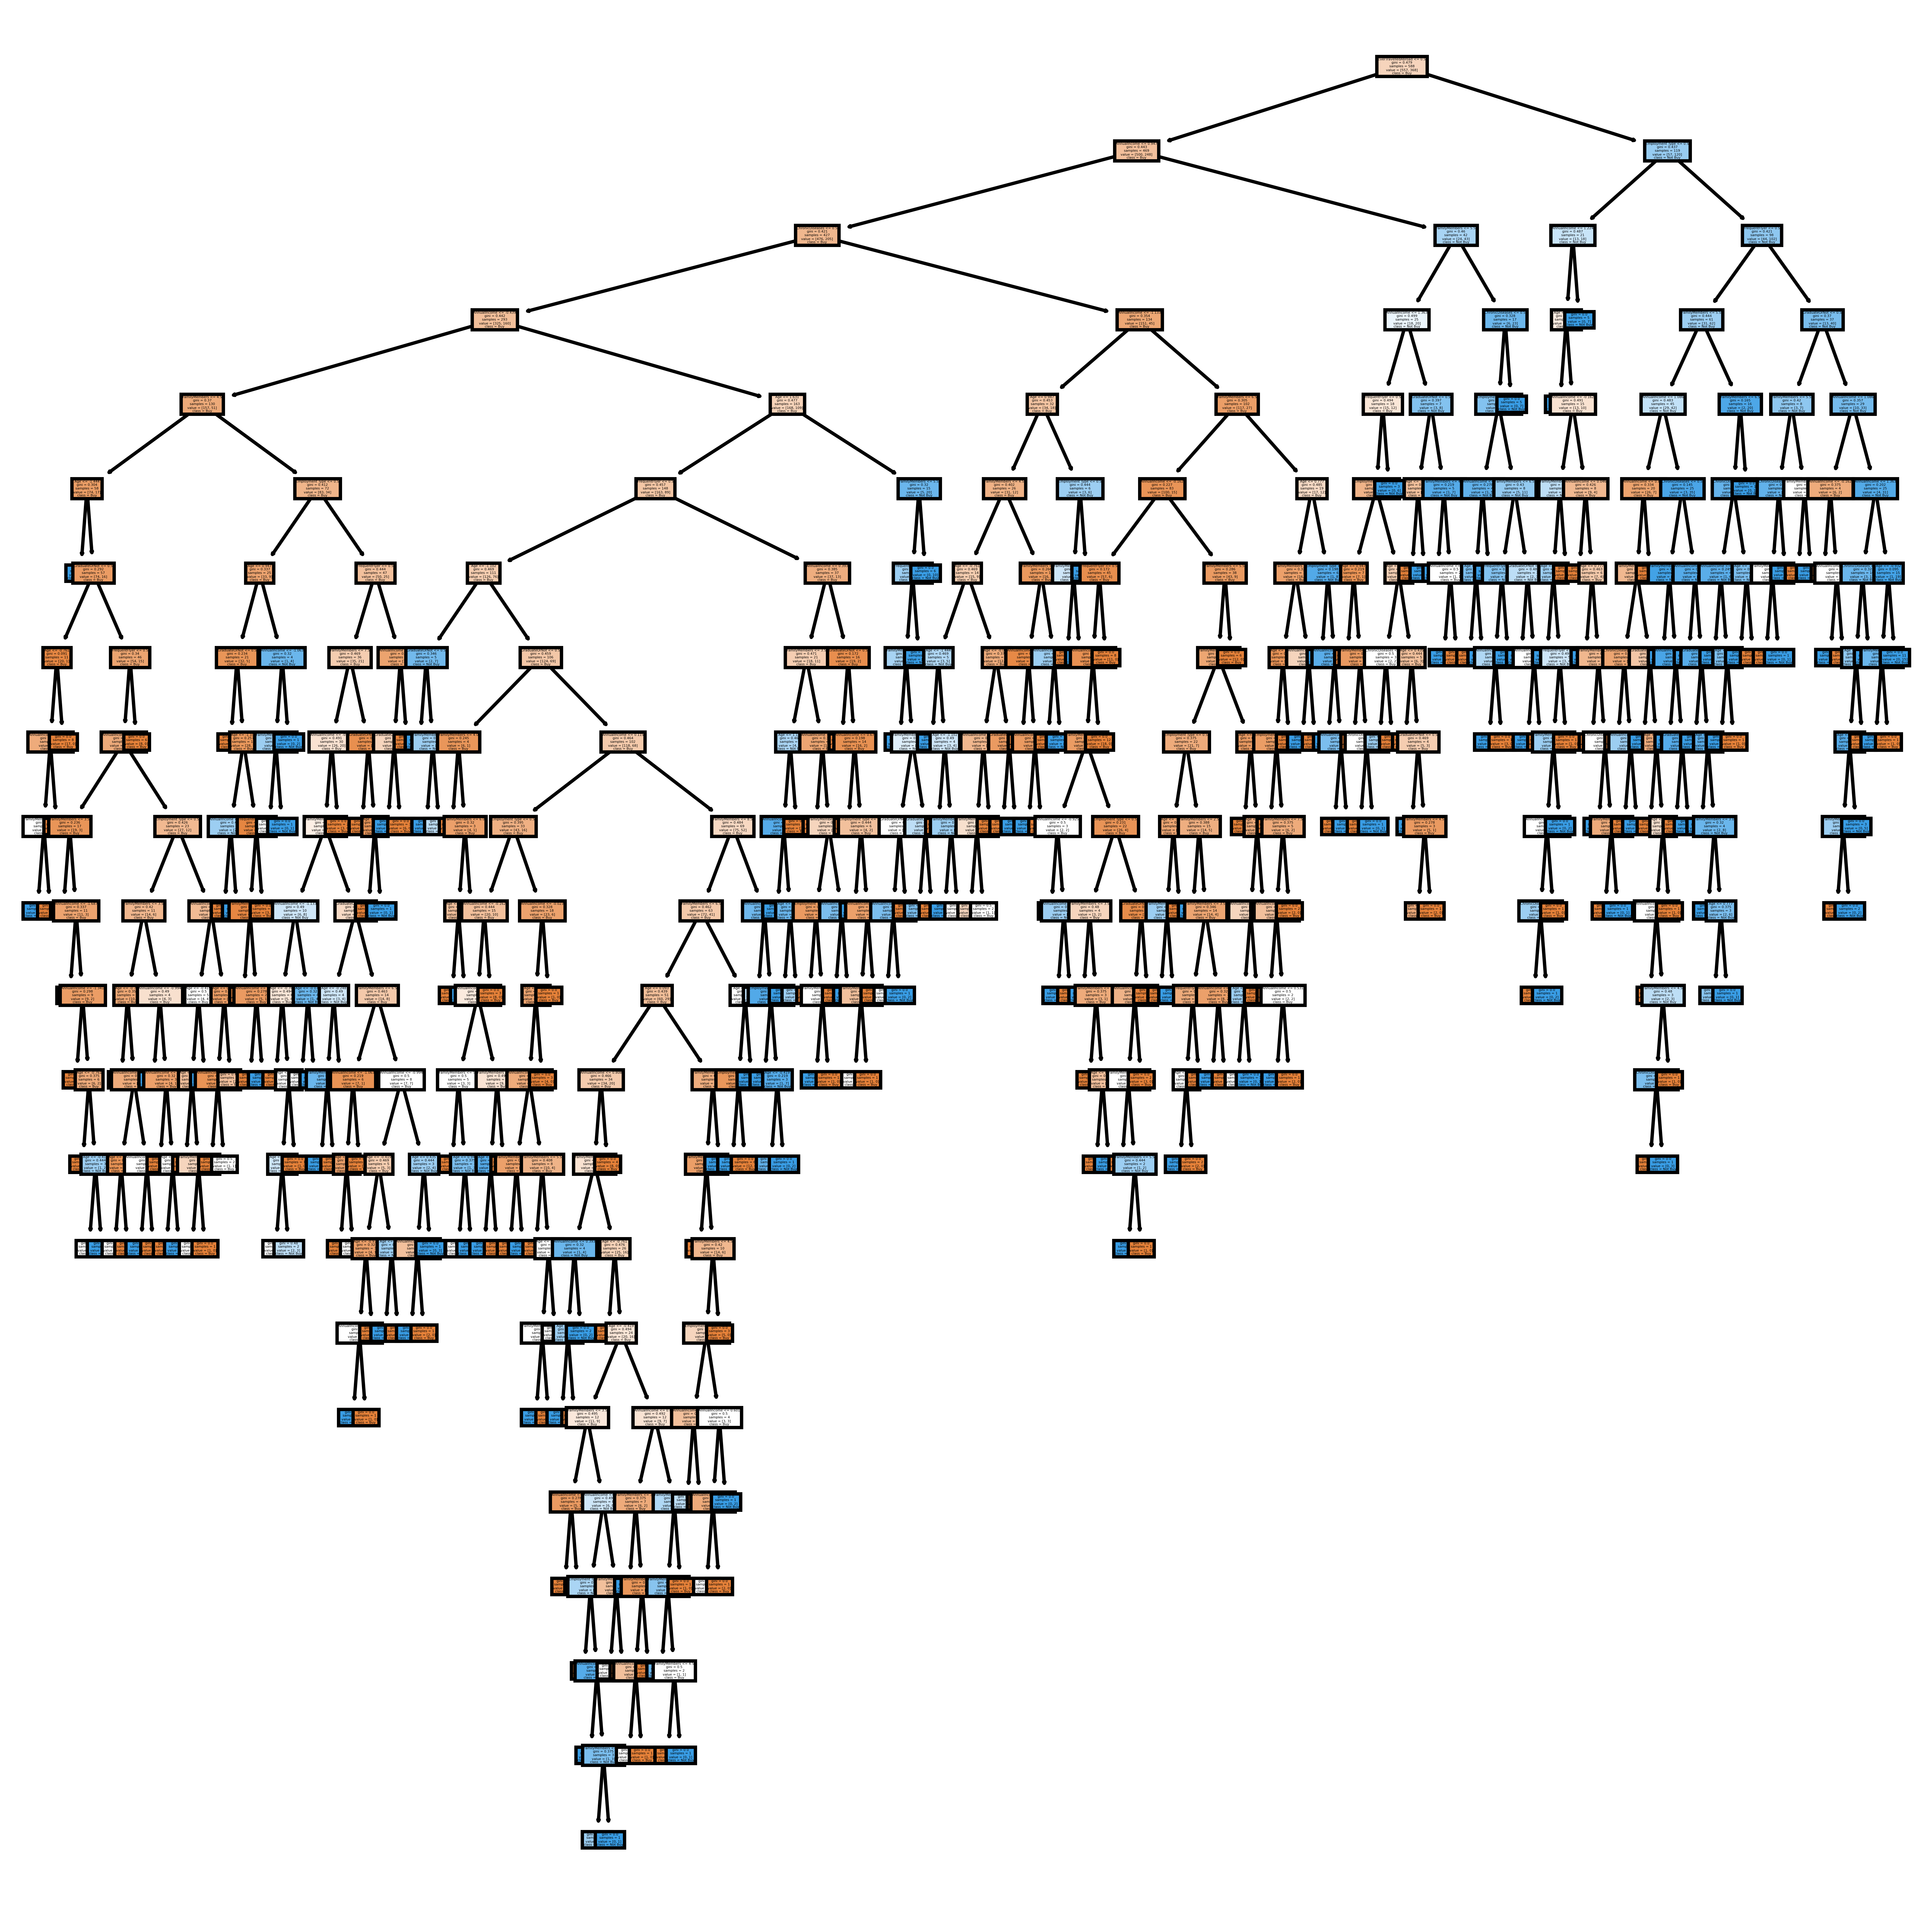

In [305]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=800)
tree.plot_tree(forest_model.estimators_[0],
               feature_names = df.drop('TravelInsurance', axis=1).columns.tolist(),
               class_names= ['Buy', 'Not Buy'],
               filled = True);

## Unsupervised Learning

### Drop kolom yang menjadi target

In [308]:
df_k = df.drop('TravelInsurance', axis=1)

### Menggunakan pd.get_dummies untuk One Hot Encoding

In [310]:
df_k = pd.get_dummies(df_k)

### Scaling dengan StandardScaler

In [340]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

df_k['AnnualIncome'] = ss.fit_transform(df_k[['AnnualIncome']])
df_k['Age'] = ss.fit_transform(df_k[['Age']])
df_k['FamilyMembers'] = ss.fit_transform(df_k[['FamilyMembers']])

### Menentukan features sebagai variable X

In [329]:
X = df_k.values

### Mencari Nilai K Optimal

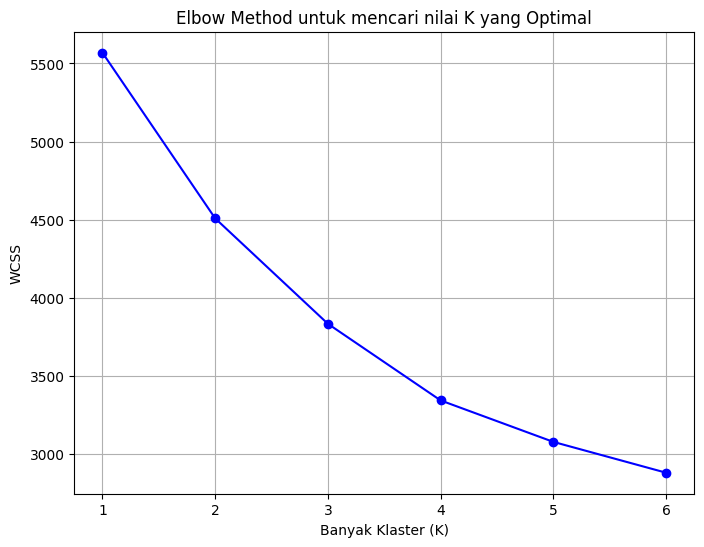

In [330]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

wcss = []

for k in range(1, 7):
  model = KMeans(n_clusters=k, n_init=10, random_state=0)
  model.fit(X)
  wcss.append(model.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 7), wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Method untuk mencari nilai K yang Optimal')
plt.xlabel('Banyak Klaster (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

### K-Means Clustering dengan K = 2

<ipython-input-339-6c96027efb2e>:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data=df_k, x="AnnualIncome", y="Age", hue="Insurance", palette=warna)


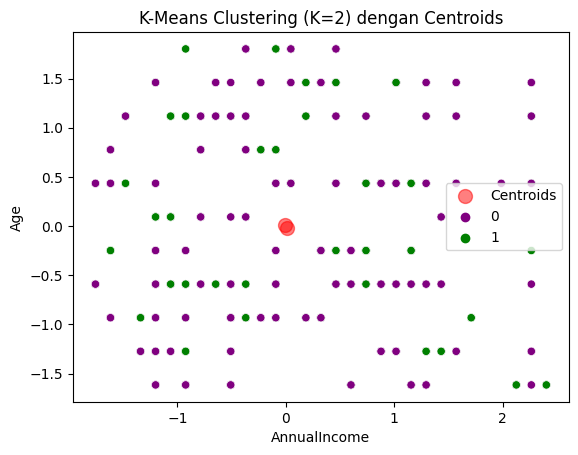

In [339]:
# inisiliasisasi K-Means
kmeans = KMeans(n_clusters= 2, n_init=10)
kmeans.fit(X)

# Membuat kolom insurance dan membuat label klaster
cluster_labels = kmeans.labels_
df_k["Insurance"] = cluster_labels

# titik pusat
centroids = kmeans.cluster_centers_
warna = ["purple", "green", "black"]
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100, label='Centroids')

sns.scatterplot(data=df_k, x="AnnualIncome", y="Age", hue="Insurance", palette=warna)

plt.title(f"K-Means Clustering (K={2}) dengan Centroids")
plt.xlabel("AnnualIncome")
plt.ylabel("Age")
plt.legend()
plt.show()

karena dataset saya kurang memiliki kolom numerik yang relevan untuk menentukan target maka plot nya terlihat tidak bagus dan tidak sesuai

### Evaluasi dengan Unlabeled Dataset

In [337]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Silhouette_score
ss_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {ss_score:.2f}")

# Davies-Bouldin Index
db_index = davies_bouldin_score(X, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.20
Davies-Bouldin Index: 1.89
Calinski-Harabasz Index: 271.55


Dilihat bahwa disini hasil klastering sangat buruk dan juga pemisahan klastering sangat tinggi sehingga disimpulkan bahwa hasil klastering jelek

### Evaluasi dengan Labeled Dataset

In [338]:
from sklearn.metrics import adjusted_rand_score # ARI
from sklearn.metrics import normalized_mutual_info_score # NMI
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score # HCV-M

# Buat crosstab untuk membandingkan cluster labels dengan true labels
cross_tab = pd.crosstab(df_k["Insurance"], df["TravelInsurance"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(df["TravelInsurance"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

# Normalized Mutual Information (NMI)
# Konversi nama pada kolom ‘species’ menjadi numerik
true_labels_num = df["TravelInsurance"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

# Fungsi HCV-M
homogeneity = homogeneity_score(df["TravelInsurance"], cluster_labels)
completeness = completeness_score(df["TravelInsurance"], cluster_labels)
v_measure = v_measure_score(df["TravelInsurance"], cluster_labels)

print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
TravelInsurance    0    1
Insurance                
0                496  270
1                217  174 

Adjusted Rand Index (ARI): 0.02
Normalized Mutual Information (NMI): 0.01
Homogeneity Score: 0.01
Completeness Score: 0.01
V-Measure Score: 0.01


dapat dilihat bahwa:
1. klastering disini sangat acak dimana ARI mendekati 0 dengan nilai 0.02
2. NMI 0.01 yang berarti kesesuaian dengan label asli sangat jelek/rendah
3. Untuk HCV, pada Homogeneity dengan nilai 0.01 berarti semua data dalam klaster berasal dari banyak kelas yang berbeda
4. pada Completeness 0.01 berarti bahwa data tidak terkelompokan dengan baik sesuai kelasnya pada satu klaster
5. V-Measure rendah karena Homogeneity dan Completeness rendah